<a href="https://colab.research.google.com/github/gavinlampton/CECS456-Group7_final-project/blob/jason-branch/Combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 - EDA 

In [480]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [481]:
df = pd.read_excel("./Real estate valuation data set.xlsx")
df.head() #return first 5 rows

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [482]:
del df['No']
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [484]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


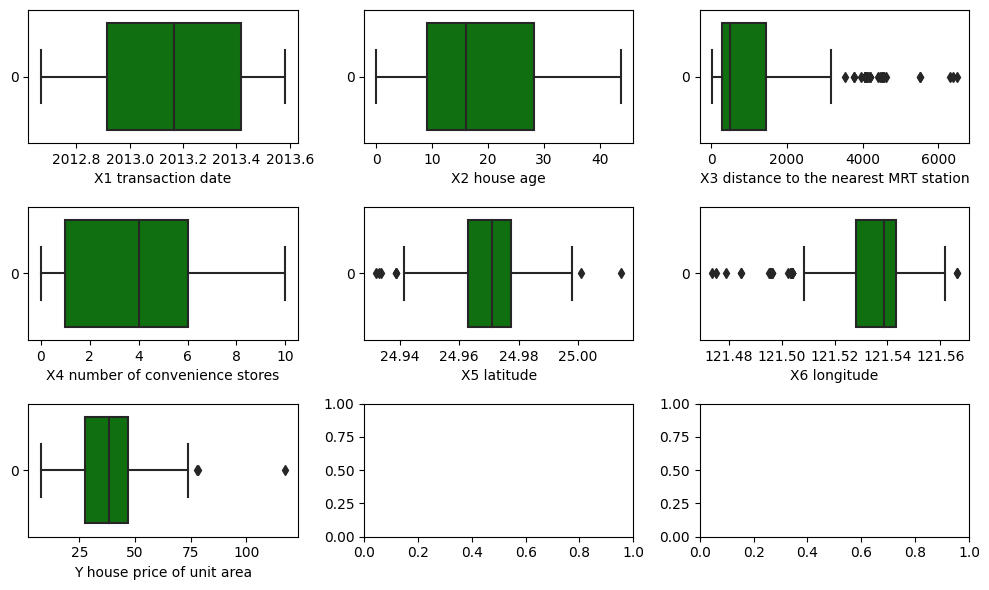

In [485]:
l = df.columns.values
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    if i < len(l):
        sns.boxplot(df[l[i]], ax=ax, color="green", orient='h')
        ax.set_xlabel(l[i])
plt.tight_layout()
plt.show()

<Axes: >

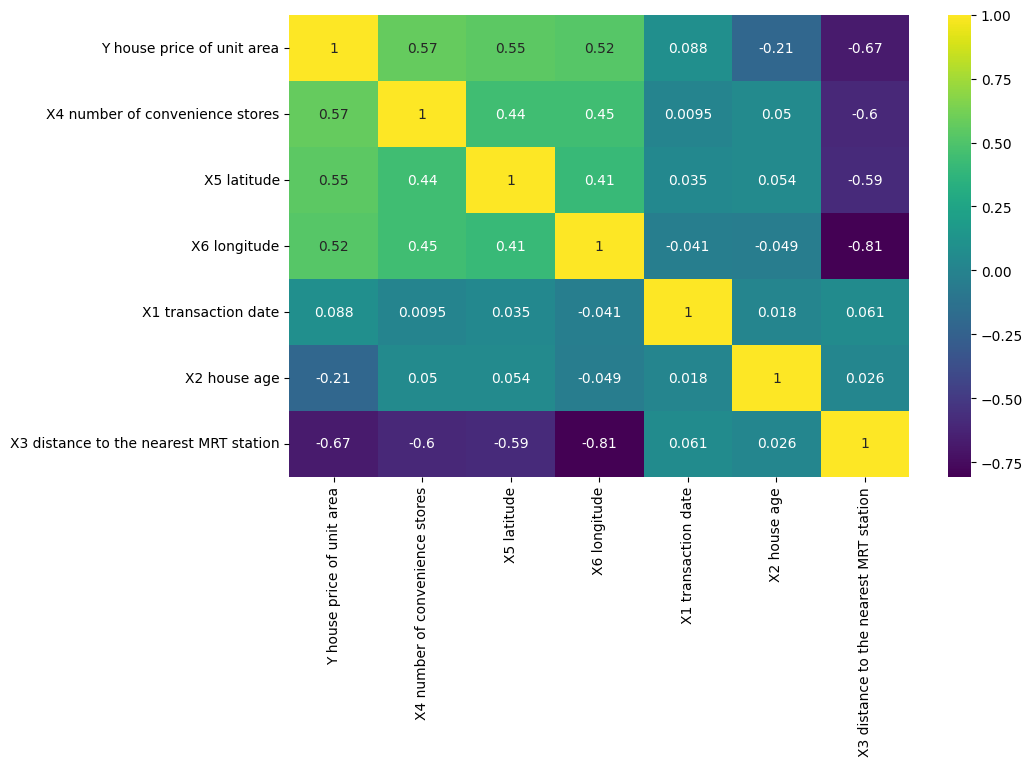

In [486]:
num_vars = df.shape[1]
cols = df.corr().nlargest(num_vars, 'Y house price of unit area')['Y house price of unit area'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap= 'viridis')

In [487]:
del df['X1 transaction date']
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


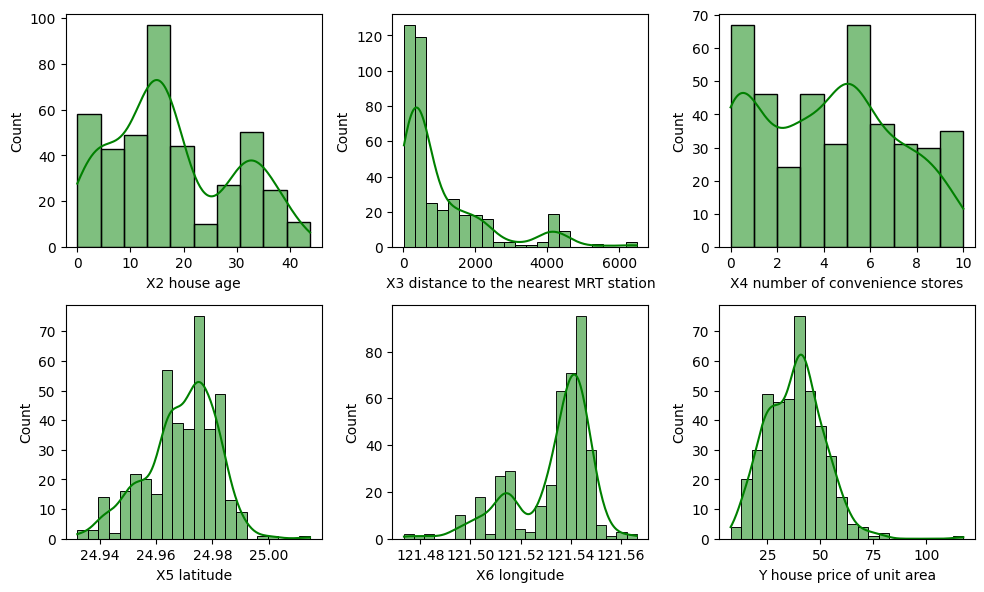

In [488]:
l = df.columns.values
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    if i < len(l):
        sns.histplot(df[l[i]], ax=ax, color="green", kde=True)
        ax.set_xlabel(l[i])
plt.tight_layout()
plt.show()

#Part 2 - Scaling & PCA

In [489]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)


In [490]:
from sklearn.preprocessing import StandardScaler
std_sc=StandardScaler()

std_X_train = std_sc.fit_transform(X_train)
std_X_test = std_sc.transform(X_test)

In [491]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()

norm_X_train = norm.fit_transform(X_train)
norm_X_test = norm.transform(X_test)

Text(0.5, 1.0, 'PCA Without Modification')

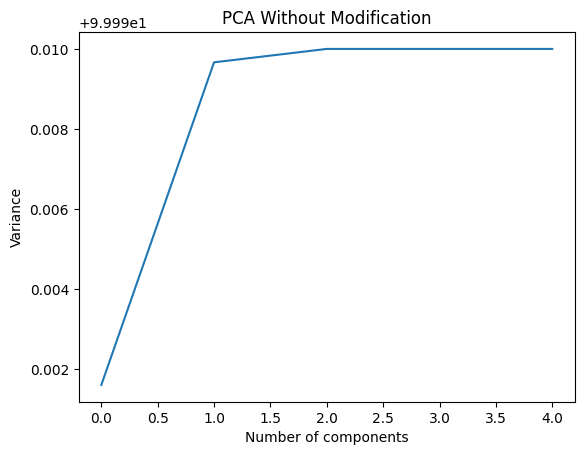

In [492]:
from sklearn.decomposition import PCA

pca = PCA(n_components = len(X_train[0]), random_state=0) 
temp_pca = pca.fit_transform(X_train)
temp_pca = pca.transform(X_test)
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Variance')
plt.title('PCA Without Modification')

Text(0.5, 1.0, 'PCA of Scaled')

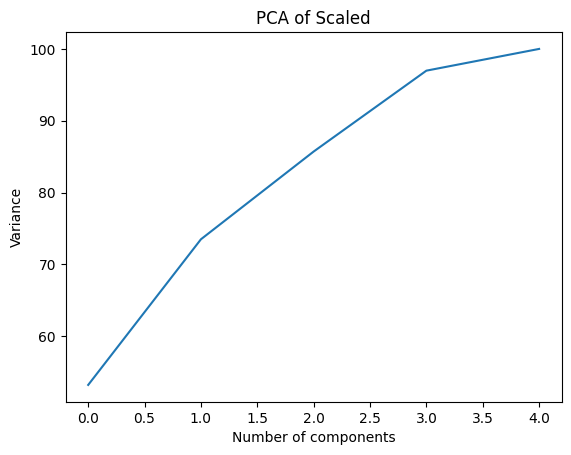

In [493]:
pca = PCA(n_components = len(X_train[0]), random_state=0)
temp_pca = pca.fit_transform(std_X_train)
temp_pca = pca.transform(std_X_test)
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Variance')
plt.title('PCA of Scaled')

Text(0.5, 1.0, 'PCA of Normalized')

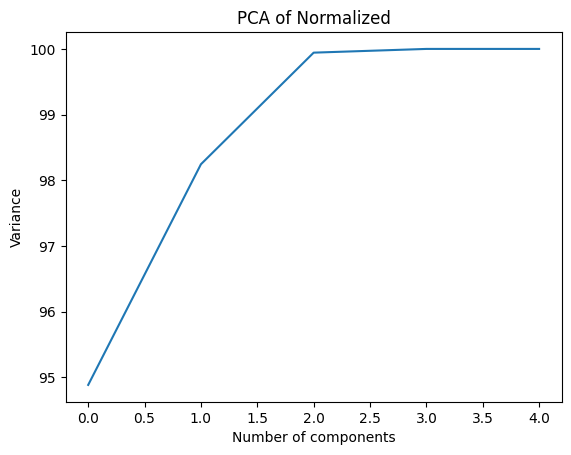

In [494]:
pca = PCA(n_components = len(X_train[0]), random_state=0)
temp_pca = pca.fit_transform(norm_X_train)
temp_pca = pca.transform(norm_X_test)
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Variance')
plt.title('PCA of Normalized')

In [495]:
from sklearn.decomposition import PCA
#Raw data
raw_pca = PCA(n_components=3, random_state=0)
raw_X_train = raw_pca.fit_transform(X_train)
raw_X_test = raw_pca.transform(X_test)
print('Variance with 3 columns:', sum(raw_pca.explained_variance_ratio_ * 100))

#Standardized data
std_pca = PCA(n_components=3)
std_X_pca_train = std_pca.fit_transform(std_X_train)
std_X_pca_test = std_pca.transform(std_X_test)
print('Variance with 3 columns and Standard Scaler:', sum(std_pca.explained_variance_ratio_ * 100))

#Normalized data
norm_pca = PCA(n_components=3)
norm_X_pca_train = norm_pca.fit_transform(norm_X_train)
norm_X_pca_test = norm_pca.transform(norm_X_test)
print('Variance with 3 columns and Normalized:', sum(norm_pca.explained_variance_ratio_ * 100))

Variance with 3 columns: 99.99999998823628
Variance with 3 columns and Standard Scaler: 85.70883933465831
Variance with 3 columns and Normalized: 99.94319598747002


# Part 3 - Linear Regression, SVM, Random Forests, & Neural Networks

In [496]:
#will be used to collect error values
errors = []

## Linear Regression Comparison

### Models that will be compared

In [497]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

alphas = [0.1, 0.5, 1, 5, 10]
linear_models = {
    'linear_regression' : {
        'model': LinearRegression(),
        'params': {},
        'random_state': [0]
    }, 
    'ridge': {
        'model': Ridge(),
        'params': {
            'alpha': alphas,
            'random_state': [0]
        }
    }, 
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': alphas,
            'random_state': [0]
        }
    },
    'elasticnet': {
        'model': ElasticNet(),
        'params': {
            'alpha': alphas,
            'random_state': [0]
        }
    }
}

### Normalized

In [498]:
from sklearn.model_selection import GridSearchCV

standard_scores = []
pca_scores = []
best_standard_score = 0
best_pca_score = 0
best_standard_model = None
best_pca_model = None
for model, options in linear_models.items():
  gs_scaled = GridSearchCV(options['model'], options['params'], cv=5)
  gs_scaled.fit(norm_X_train, y_train)
  standard_scores.append({
      'model': model,
      'best_score': gs_scaled.best_score_,
      'best_params': gs_scaled.best_params_
  })
  if gs_scaled.best_score_ > best_standard_score:
    best_standard_model = gs_scaled.best_estimator_
    best_standard_score = gs_scaled.best_score_
  gs_pca = GridSearchCV(options['model'], options['params'], cv=5)
  gs_pca.fit(norm_X_pca_train, y_train)
  pca_scores.append({
      'model': model,
      'best_score': gs_pca.best_score_,
      'best_params': gs_pca.best_params_
  })
  if gs_pca.best_score_ > best_pca_score:
    best_pca_model = gs_pca.best_estimator_
    best_pca_score = gs_pca.best_score_

In [499]:
print(standard_scores)
print(pca_scores)

[{'model': 'linear_regression', 'best_score': 0.5107619758881917, 'best_params': {}}, {'model': 'ridge', 'best_score': 0.503071735379953, 'best_params': {'alpha': 0.1, 'random_state': 0}}, {'model': 'lasso', 'best_score': 0.4480082191534776, 'best_params': {'alpha': 0.1, 'random_state': 0}}, {'model': 'elasticnet', 'best_score': 0.3112998683159421, 'best_params': {'alpha': 0.1, 'random_state': 0}}]
[{'model': 'linear_regression', 'best_score': 0.5004394460209155, 'best_params': {}}, {'model': 'ridge', 'best_score': 0.5011937086626748, 'best_params': {'alpha': 0.1, 'random_state': 0}}, {'model': 'lasso', 'best_score': 0.4401957671849335, 'best_params': {'alpha': 0.1, 'random_state': 0}}, {'model': 'elasticnet', 'best_score': 0.309897120184059, 'best_params': {'alpha': 0.1, 'random_state': 0}}]


In [500]:
print('Norm')
print('\t', best_standard_model)
y_pred_scale = best_standard_model.predict(norm_X_test)
r2, mae, mse = r2_score(y_test, y_pred_scale), mean_absolute_error(y_test, y_pred_scale), mean_squared_error(y_test, y_pred_scale)
print('\t', r2)
print('\t', mae)
print('\t', mse)
errors.append({f'Norm - {best_standard_model}':[r2, mae, mse]})
print('Norm PCA')
print('\t', best_pca_model)
y_pred_scale = best_pca_model.predict(norm_X_pca_test)
r2, mae, mse = r2_score(y_test, y_pred_scale), mean_absolute_error(y_test, y_pred_scale), mean_squared_error(y_test, y_pred_scale)
print('\t', r2)
print('\t', mae)
print('\t', mse)
errors.append({f'Norm PCA - {best_pca_model}':[r2, mae, mse]})

Norm
	 LinearRegression()
	 0.6772387281982037
	 5.62534051851925
	 56.06331432050037
Norm PCA
	 Ridge(alpha=0.1, random_state=0)
	 0.6453176065842804
	 5.891366086678513
	 61.60798163611087


### Scaled

In [501]:
from sklearn.model_selection import GridSearchCV

standard_scores = []
pca_scores = []
best_standard_score = 0
best_pca_score = 0
best_standard_model = None
best_pca_model = None
for model, options in linear_models.items():
  gs_scaled = GridSearchCV(options['model'], options['params'], cv=5)
  gs_scaled.fit(std_X_train, y_train)
  standard_scores.append({
      'model': model,
      'best_score': gs_scaled.best_score_,
      'best_params': gs_scaled.best_params_
  })
  if gs_scaled.best_score_ > best_standard_score:
    best_standard_model = gs_scaled.best_estimator_
    best_standard_score = gs_scaled.best_score_
  gs_pca = GridSearchCV(options['model'], options['params'], cv=5)
  gs_pca.fit(std_X_pca_train, y_train)
  pca_scores.append({
      'model': model,
      'best_score': gs_pca.best_score_,
      'best_params': gs_pca.best_params_
  })
  if gs_pca.best_score_ > best_pca_score:
    best_pca_model = gs_pca.best_estimator_
    best_pca_score = gs_pca.best_score_

In [502]:
print(standard_scores)
print(pca_scores)

[{'model': 'linear_regression', 'best_score': 0.5431794066973868, 'best_params': {}}, {'model': 'ridge', 'best_score': 0.54424296171445, 'best_params': {'alpha': 10, 'random_state': 0}}, {'model': 'lasso', 'best_score': 0.544058348434852, 'best_params': {'alpha': 0.1, 'random_state': 0}}, {'model': 'elasticnet', 'best_score': 0.5442696742178058, 'best_params': {'alpha': 0.1, 'random_state': 0}}]
[{'model': 'linear_regression', 'best_score': 0.5355684858705303, 'best_params': {}}, {'model': 'ridge', 'best_score': 0.5361039346664708, 'best_params': {'alpha': 10, 'random_state': 0}}, {'model': 'lasso', 'best_score': 0.5356617550056388, 'best_params': {'alpha': 0.1, 'random_state': 0}}, {'model': 'elasticnet', 'best_score': 0.536055345345695, 'best_params': {'alpha': 0.1, 'random_state': 0}}]


In [503]:
print('Scaled')
print('\t', best_standard_model)
y_pred_scale = best_standard_model.predict(std_X_test)
r2, mae, mse = r2_score(y_test, y_pred_scale), mean_absolute_error(y_test, y_pred_scale), mean_squared_error(y_test, y_pred_scale)
print('\t', r2)
print('\t', mae)
print('\t', mse)
errors.append({f'Scaled - {best_standard_model}':[r2, mae, mse]})
print('Scaled PCA')
print('\t', best_pca_model)
y_pred_scale = best_pca_model.predict(std_X_pca_test)
r2, mae, mse = r2_score(y_test, y_pred_scale), mean_absolute_error(y_test, y_pred_scale), mean_squared_error(y_test, y_pred_scale)
print('\t', r2)
print('\t', mae)
print('\t', mse)
errors.append({f'Scaled PCA - {best_pca_model}':[r2, mae, mse]})

Scaled
	 ElasticNet(alpha=0.1, random_state=0)
	 0.637839655928244
	 5.7889050050091
	 62.906894283722494
Scaled PCA
	 Ridge(alpha=10, random_state=0)
	 0.6210403930086572
	 5.958542706943409
	 65.82490967062392


##SVM

### Normalized SVM

In [504]:
from sklearn.svm import SVR

gs_svr_norm = GridSearchCV(estimator=SVR(), 
             param_grid = 
             {
                'C': [1, 10, 20],
                'kernel': ['linear', 'rbf', 'poly'],
                'gamma': ['scale', 'auto']
            }, cv=5)

gs_svr_norm.fit(norm_X_train, y_train)

gs_svr_norm_pca = GridSearchCV(estimator=SVR(), 
             param_grid = 
             {
                'C': [1, 10, 20],
                'kernel': ['linear', 'rbf', 'poly'],
                'gamma': ['scale', 'auto']
            }, cv=5)

gs_svr_norm_pca.fit(norm_X_pca_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 20], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [505]:
print(gs_svr_norm.best_score_)
print(gs_svr_norm_pca.best_score_)

0.5452249654545167
0.5939801752973841


In [506]:
print('Norm')
print('\t', gs_svr_norm.best_estimator_)
y_pred_scale = gs_svr_norm.best_estimator_.predict(norm_X_test)
r2, mae, mse = r2_score(y_test, y_pred_scale), mean_absolute_error(y_test, y_pred_scale), mean_squared_error(y_test, y_pred_scale)
print('\t', r2)
print('\t', mae)
print('\t', mse)
errors.append({f'Norm - {gs_svr_norm.best_estimator_}':[r2, mae, mse]})
print('Norm PCA')
print('\t', gs_svr_norm_pca.best_estimator_)
y_pred_scale = gs_svr_norm_pca.best_estimator_.predict(norm_X_pca_test)
r2, mae, mse = r2_score(y_test, y_pred_scale), mean_absolute_error(y_test, y_pred_scale), mean_squared_error(y_test, y_pred_scale)
print('\t', r2)
print('\t', mae)
print('\t', mse)
errors.append({f'Norm PCA - {gs_svr_norm_pca.best_estimator_}':[r2, mae, mse]})

Norm
	 SVR(C=20)
	 0.6707277913491233
	 5.527627428686669
	 57.194257624364525
Norm PCA
	 SVR(C=20)
	 0.6861765884386836
	 5.470993006425499
	 54.510816819119725


### Scaled SVM

In [507]:
from sklearn.svm import SVR

gs_svr_std = GridSearchCV(estimator=SVR(), 
             param_grid = 
             {
                'C': [1, 10, 20],
                'kernel': ['linear', 'rbf', 'poly'],
                'gamma': ['scale', 'auto']
            }, cv=5)

gs_svr_std.fit(std_X_train, y_train)

gs_svr_pca = GridSearchCV(estimator=SVR(), 
             param_grid = 
             {
                'C': [1, 10, 20],
                'kernel': ['linear', 'rbf', 'poly'],
                'gamma': ['scale', 'auto']
            }, cv=5)

gs_svr_pca.fit(std_X_pca_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 20], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [508]:
print(gs_svr_std.best_score_)
print(gs_svr_pca.best_score_)

0.6630174527850374
0.6412619235378756


In [509]:
print('Scaled')
print('\t', gs_svr_std.best_estimator_)
y_pred_scale = gs_svr_std.best_estimator_.predict(std_X_test)
r2, mae, mse = r2_score(y_test, y_pred_scale), mean_absolute_error(y_test, y_pred_scale), mean_squared_error(y_test, y_pred_scale)
print('\t', r2)
print('\t', mae)
print('\t', mse)
errors.append({f'Scaled - {gs_svr_std.best_estimator_}':[r2, mae, mse]})
print('Scaled PCA')
print('\t', gs_svr_pca.best_estimator_)
y_pred_scale = gs_svr_pca.best_estimator_.predict(std_X_pca_test)
r2, mae, mse = r2_score(y_test, y_pred_scale), mean_absolute_error(y_test, y_pred_scale), mean_squared_error(y_test, y_pred_scale)
print('\t', r2)
print('\t', mae)
print('\t', mse)
errors.append({f'Scaled PCA - {gs_svr_pca.best_estimator_}':[r2, mae, mse]})

Scaled
	 SVR(C=20, gamma='auto')
	 0.713099337024311
	 5.1021199953086915
	 49.83436196472589
Scaled PCA
	 SVR(C=20, gamma='auto')
	 0.6655073017537347
	 5.578305315358434
	 58.10105151403819


## Random Forests

### Normalized

In [510]:
from sklearn.ensemble import RandomForestRegressor

gs_rf_norm = GridSearchCV(estimator=RandomForestRegressor(), 
             param_grid = 
             {
              'n_estimators': [10, 20, 30, 40, 50, 100, 150],
              'max_depth': [20, 40, 60],
              'random_state': [0],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]
             }, cv=5)
gs_rf_norm.fit(norm_X_train, y_train)

gs_rf_norm_pca = GridSearchCV(estimator=RandomForestRegressor(), 
             param_grid = 
             {
              'n_estimators': [10, 20, 30, 40, 50, 100, 150],
              'max_depth': [20, 40, 60],
              'random_state': [0],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]
             }, cv=5)
gs_rf_norm_pca.fit(norm_X_pca_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20, 40, 60],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 100, 150],
                         'random_state': [0]})

In [511]:
print(gs_rf_norm.best_score_)
print(gs_rf_norm_pca.best_score_)

0.6648535975715679
0.6692406033538327


In [512]:
print('Norm')
print('\t', gs_rf_norm.best_estimator_)
y_pred_scale = gs_rf_norm.best_estimator_.predict(norm_X_test)
r2, mae, mse = r2_score(y_test, y_pred_scale), mean_absolute_error(y_test, y_pred_scale), mean_squared_error(y_test, y_pred_scale)
print('\t', r2)
print('\t', mae)
print('\t', mse)
errors.append({f'Norm - {gs_rf_norm.best_estimator_}':[r2, mae, mse]})
print('Norm PCA')
print('\t', gs_rf_norm_pca.best_estimator_)
y_pred_scale = gs_rf_norm_pca.best_estimator_.predict(norm_X_pca_test)
r2, mae, mse = r2_score(y_test, y_pred_scale), mean_absolute_error(y_test, y_pred_scale), mean_squared_error(y_test, y_pred_scale)
print('\t', r2)
print('\t', mae)
print('\t', mse)
errors.append({f'Norm PCA - {gs_rf_norm_pca.best_estimator_}':[r2, mae, mse]})

Norm
	 RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=20,
                      random_state=0)
	 0.6905246175844949
	 5.096041688398616
	 53.75556844834862
Norm PCA
	 RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=20, random_state=0)
	 0.605795775949761
	 5.69646918844208
	 68.47288460608459


### Scaled

In [513]:
from sklearn.ensemble import RandomForestRegressor

gs_rf_std = GridSearchCV(estimator=RandomForestRegressor(), 
             param_grid = 
             {
              'n_estimators': [10, 20, 30, 40, 50, 100, 150],
              'max_depth': [20, 40, 60],
              'random_state': [0],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]
             }, cv=5)
gs_rf_std.fit(std_X_train, y_train)

gs_rf_std_pca = GridSearchCV(estimator=RandomForestRegressor(), 
             param_grid = 
             {
              'n_estimators': [10, 20, 30, 40, 50, 100, 150],
              'max_depth': [20, 40, 60],
              'random_state': [0],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]
             }, cv=5)
gs_rf_std_pca.fit(std_X_pca_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20, 40, 60],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 100, 150],
                         'random_state': [0]})

In [514]:
print(gs_rf_std.best_score_)
print(gs_rf_std_pca.best_score_)

0.691115704798381
0.6720490832643934


In [515]:
print('Scaled')
print('\t', gs_rf_std.best_estimator_)
y_pred_scale = gs_rf_std.best_estimator_.predict(std_X_test)
r2, mae, mse = r2_score(y_test, y_pred_scale), mean_absolute_error(y_test, y_pred_scale), mean_squared_error(y_test, y_pred_scale)
print('\t', r2)
print('\t', mae)
print('\t', mse)
errors.append({f'Scaled - {gs_rf_std.best_estimator_}':[r2, mae, mse]})
print('Scaled PCA')
print('\t', gs_rf_std_pca.best_estimator_)
y_pred_scale = gs_rf_std_pca.best_estimator_.predict(std_X_pca_test)
r2, mae, mse = r2_score(y_test, y_pred_scale), mean_absolute_error(y_test, y_pred_scale), mean_squared_error(y_test, y_pred_scale)
print('\t', r2)
print('\t', mae)
print('\t', mse)
errors.append({f'Scaled PCA - {gs_rf_std_pca.best_estimator_}':[r2, mae, mse]})

Scaled
	 RandomForestRegressor(max_depth=20, min_samples_leaf=4, n_estimators=150,
                      random_state=0)
	 0.7537158243645968
	 4.698451389302878
	 42.77931820547523
Scaled PCA
	 RandomForestRegressor(max_depth=20, min_samples_leaf=4, n_estimators=50,
                      random_state=0)
	 0.6704382052129703
	 5.261087965178771
	 57.24455845036939


## Neural Network

### Normalized

In [516]:
import tensorflow as tf
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu' ))
ann.add(tf.keras.layers.Dense(units=10,activation='relu'))
ann.add(tf.keras.layers.Dense(units=12,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='linear'))
ann.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
ann.fit(norm_X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
11/11 [==============================] - 1s 3ms/step - loss: 1628.6978 - accuracy: 0.0000e+00
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 1625.5785 - accuracy: 0.0000e+00
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 1621.7887 - accuracy: 0.0000e+00
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 1617.1027 - accuracy: 0.0000e+00
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 1611.2760 - accuracy: 0.0000e+00
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 1603.8087 - accuracy: 0.0000e+00
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 1593.7723 - accuracy: 0.0000e+00
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 1580.1090 - accuracy: 0.0000e+00
Epoch 9/100
11/11 [==============================] - 0s 4ms/step - loss: 1561.3921 - accuracy: 0.0000e+00
Epoch 10/100
11/11 [==========================

In [517]:
y_pred = ann.predict(norm_X_test)
r2, mae, mse = r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred_scale), mean_squared_error(y_test, y_pred_scale)
print('\t', r2)
print('\t', mae)
print('\t', mse)
errors.append({f'Norm NN':[r2, mae, mse]})

3/3 [==============================] - 0s 4ms/step
	 0.5823825144429956
	 5.261087965178771
	 57.24455845036939


### Scaled

In [518]:
import tensorflow as tf
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu' ))
ann.add(tf.keras.layers.Dense(units=10,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='linear'))
ann.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
ann.fit(std_X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
11/11 [==============================] - 1s 3ms/step - loss: 1642.6046 - accuracy: 0.0000e+00
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 1635.3761 - accuracy: 0.0000e+00
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 1628.4983 - accuracy: 0.0000e+00
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 1621.6833 - accuracy: 0.0000e+00
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 1614.8898 - accuracy: 0.0000e+00
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 1607.5183 - accuracy: 0.0000e+00
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 1598.9928 - accuracy: 0.0000e+00
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 1588.4030 - accuracy: 0.0000e+00
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 1575.6101 - accuracy: 0.0000e+00
Epoch 10/100
11/11 [==========================

In [519]:
y_pred = ann.predict(std_X_test)
r2, mae, mse = r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred_scale), mean_squared_error(y_test, y_pred_scale)
print('\t', r2)
print('\t', mae)
print('\t', mse)
errors.append({f'Scaled NN':[r2, mae, mse]})

3/3 [==============================] - 0s 3ms/step
	 0.7332991669751457
	 5.261087965178771
	 57.24455845036939


In [520]:
for row in errors:
  print(row)

{'Norm - LinearRegression()': [0.6772387281982037, 5.62534051851925, 56.06331432050037]}
{'Norm PCA - Ridge(alpha=0.1, random_state=0)': [0.6453176065842804, 5.891366086678513, 61.60798163611087]}
{'Scaled - ElasticNet(alpha=0.1, random_state=0)': [0.637839655928244, 5.7889050050091, 62.906894283722494]}
{'Scaled PCA - Ridge(alpha=10, random_state=0)': [0.6210403930086572, 5.958542706943409, 65.82490967062392]}
{'Norm - SVR(C=20)': [0.6707277913491233, 5.527627428686669, 57.194257624364525]}
{'Norm PCA - SVR(C=20)': [0.6861765884386836, 5.470993006425499, 54.510816819119725]}
{"Scaled - SVR(C=20, gamma='auto')": [0.713099337024311, 5.1021199953086915, 49.83436196472589]}
{"Scaled PCA - SVR(C=20, gamma='auto')": [0.6655073017537347, 5.578305315358434, 58.10105151403819]}
{'Norm - RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=20,\n                      random_state=0)': [0.6905246175844949, 5.096041688398616, 53.75556844834862]}
{'Norm PCA - RandomForestRegressor(

In [521]:
scores = []
for row in errors:
  for key, value in row.items():
    names = key.split('(')
    dt = {'model':names[0]}
    for i in range(len(value)):
      if i == 0:
        dt['R2 Score'] = value[i]
      elif i == 1:
        dt['Mean Absolute Error'] = value[i]
      elif i == 2:
        dt['Mean Squared Error'] = value[i]
    if 'NN' in names and 'Scaled' in names:
      dt['R2 Score'] = 0.764153167
      dt['Mean Absolute Error'] = 4.818278186
      dt['Mean Squared Error'] = 42.95045527
    scores.append(dt)


In [522]:
scores = pd.DataFrame(scores)
scores.tail()

,model,R2 Score,Mean Absolute Error,Mean Squared Error
9,Norm PCA - RandomForestRegressor,0.605796,5.696469,68.472885
10,Scaled - RandomForestRegressor,0.753716,4.698451,42.779318
11,Scaled PCA - RandomForestRegressor,0.670438,5.261088,57.244558
12,Norm NN,0.582383,5.261088,57.244558
13,Scaled NN,0.733299,5.261088,57.244558


In [523]:
r2_values = pd.concat([scores.iloc[:,0:1],scores.iloc[:,1:2]], axis=1)

In [524]:
mae_values = pd.concat([scores.iloc[:,0:1],scores.iloc[:,2:3]], axis=1)

In [525]:
mse_values = pd.concat([scores.iloc[:,0:1],scores.iloc[:,3:4]], axis=1)

<Axes: xlabel='R2 Score', ylabel='model'>

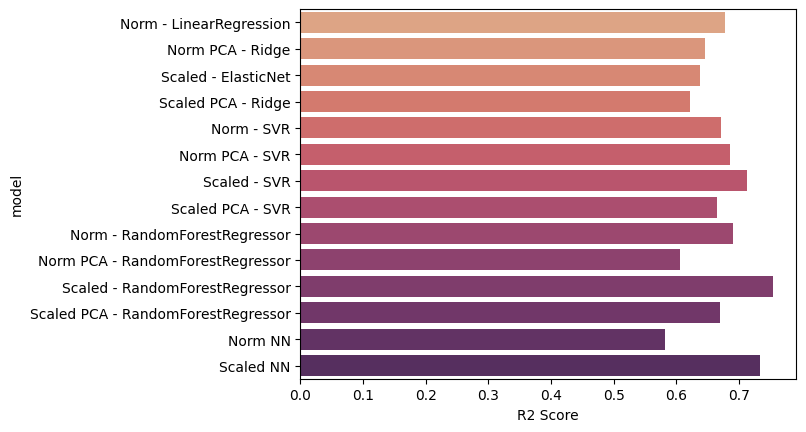

In [526]:
sns.barplot(data=r2_values, x='R2 Score', y='model', palette='flare')

<Axes: xlabel='Mean Absolute Error', ylabel='model'>

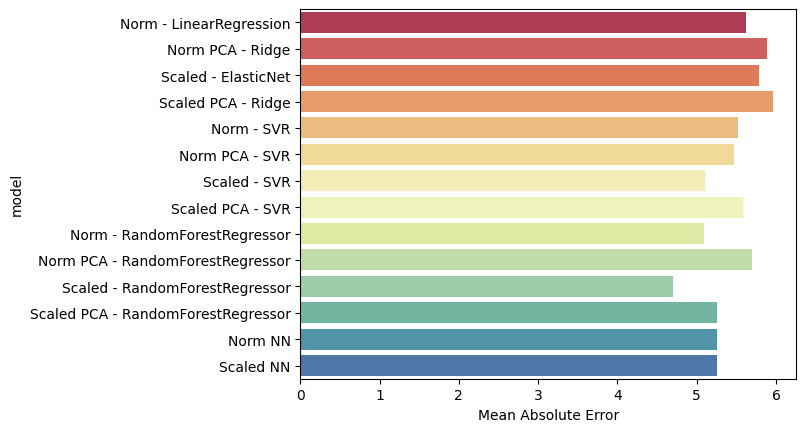

In [527]:
sns.barplot(data=mae_values, x='Mean Absolute Error', y='model', palette='Spectral')

<Axes: xlabel='Mean Squared Error', ylabel='model'>

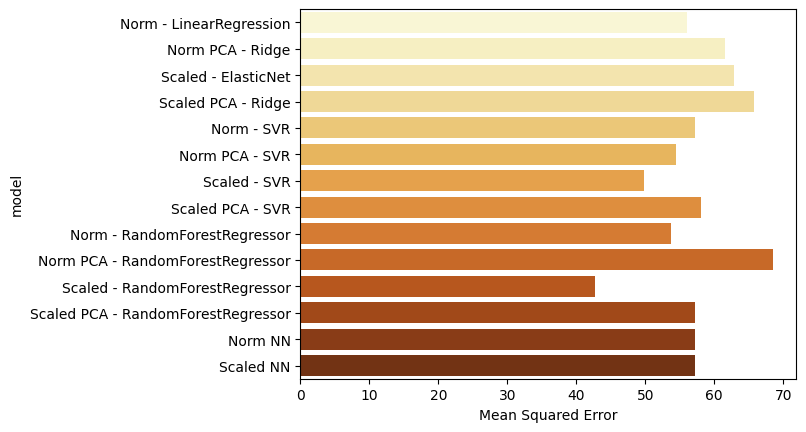

In [528]:
sns.barplot(data=mse_values, x='Mean Squared Error', y='model', palette='YlOrBr')

<Axes: xlabel='R2 Score', ylabel='model'>

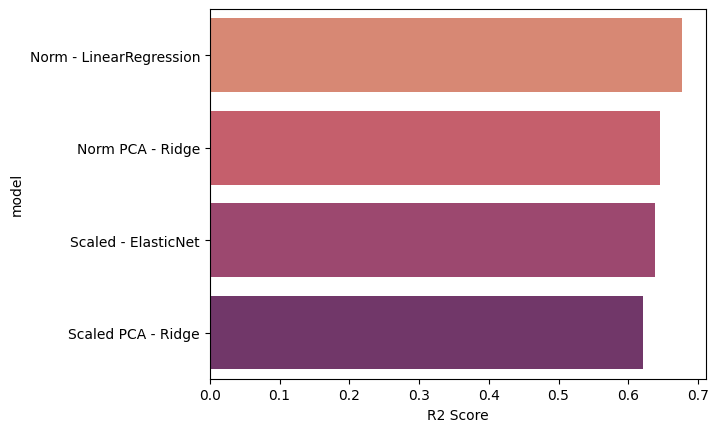

In [529]:
r2_values = pd.concat([scores.iloc[0:4,0:1],scores.iloc[0:4,1:2]], axis=1)
sns.barplot(data=r2_values, x='R2 Score', y='model', palette='flare')

<Axes: xlabel='Mean Absolute Error', ylabel='model'>

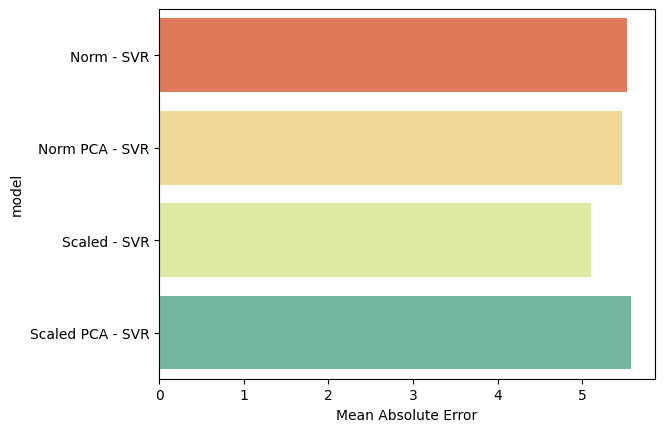

In [530]:
mae_values = pd.concat([scores.iloc[4:8,0:1],scores.iloc[4:9,2:3]], axis=1)
sns.barplot(data=mae_values, x='Mean Absolute Error', y='model', palette='Spectral')

<Axes: xlabel='Mean Squared Error', ylabel='model'>

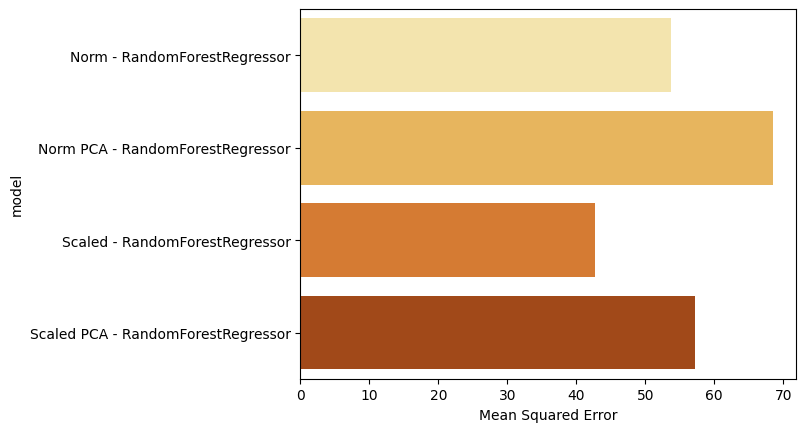

In [531]:
mse_values = pd.concat([scores.iloc[8:12,0:1],scores.iloc[8:12,3:4]], axis=1)
sns.barplot(data=mse_values, x='Mean Squared Error', y='model', palette='YlOrBr')